# TP - Unsupervised Learning  
2019-01-02

## 1. Overview of work  
Unsupervised learning is a category of machine learning. Unlike the supervised learning, the datasets used in unsupervised learning are not with labels, which means the aim of algorithm is to find the clusters unknown in the dataset.  

Generally, the algorithms of clustering can be divided as quite different types:   
**1. Clustering based on center points selected(for example: K-means)**  
**2. Clustering based on density(for example: DBSCAN)**  
**3. Clustering based on hierarchy**  

In this work, we will pay attentions to the **clustering based on density**. We will use **DBSCAN**, a classic algorithm based on density to get the clusters for the dataset. Then, in the second part, we will realise a new algorithm named **SNN(Shared Nearest Neighbors)**, to see the difference between them.

The function of DBSCAN we used is the API of scikit-learn. And for simplifing the use of the SNN, so we realise the SNN with the similiar style as scikit-learn. More details will be explained in the second part.

## 2. First Part of unsupervised learning: DBSCAN   
The first part of this work is DBSCAN. DBSCAN is an algorithm based on density. The density defined in the DBSCAN refers to serverals small circles, which are decided by three parameters:   

**1. The method of defining the distance between points**  
**2. The scale of circle of defining the density(epsions)**  
**3. The mininum number of points in the circle of defining a core point**  
   
After defining three above parameters, we can find a subset of points in the dataset are satisifable for those conditions, which we define as **core points**. Then, propagating those core points, we can get all clusters for the dataset.  

Serveral features of the DBSCAN:   
**1. The number of cluster is unknown before training the dataset**  
**2. It can classify the noise points, which refers to points do not belong to any cluster**  

The major drawback of DBSCAN is the **time of calculating the distances between points** for finding the core points, same as the KNN, and other algorithms calculating distances.

### 2.1 loading the dataset we will use  
Because the time of fitting the model, so here we will use two datasets, not all four datasets.

In [1]:
# load the toy dataset with the help of np.genfromtxt
import numpy as np

data1 = np.genfromtxt("/home/nwpuhh/Workplace/INSA_TPs/MachineLearning/Unsupervised Learning/cham-data/t4.8k.dat", delimiter=" ", skip_header=1)
data2 = np.genfromtxt("/home/nwpuhh/Workplace/INSA_TPs/MachineLearning/Unsupervised Learning/cham-data/t5.8k.dat", delimiter=" ", skip_header=1)

### 2.2 preparing the parameters array, and defining functions for creating models and plot models   
For finding the best parameters of the model for the dataset selected, so we set two arrays of **eps** and **num_neighbors** for changing the two parameters.   

For the distance chosen, we have used the **euclidien distance** as the default type of distance.

In [2]:
# start the clustering using DBSCAN
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn import metrics
# because of the parameter of eps and min_samples, so we need to find the good parameters
epses = np.linspace(3, 10, 30)
num_neigbors = np.arange(5,20, 1)

# define two fuctions for creating dbscan models and plot the models
def create_model_with_scores_diff(data, distance, num_neighbor):
    if distance == 0 or num_neighbor == 0:
        print "The parameter can not be 0"
        return 0
    db_model = DBSCAN(eps = distance, min_samples=num_neighbor).fit(data)
    labels = db_model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    #print n_clusters_
    if(n_clusters_ <= 1):
        return -1, db_model
    else:
        return metrics.silhouette_score(data, labels), db_model

def plot_model(db_model, data, eps, num, score):
    labels = db_model.labels_
    core_samples_mask = np.zeros_like(db_model.labels_, dtype=bool)
    core_samples_mask[db_model.core_sample_indices_] = True
    # plot the clustering result and then return the score of clustering(silhouette_score)
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
        for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=2)

    plt.title('Estimated number of clusters: '+str(len(set(labels)))+' with eps: '+str(eps)+' num: '+str(num)+', and score: '+str(score)+'')
    plt.show()

### 2.3 fitting the DBSCAN model to the dataset 1, and plotting models with ten best scores  

In [12]:
# trainging the dataset of data1
# using the function above
scores_sil = {}
db_models = {}
# for the data1
for eps in epses:
    for num in num_neigbors:
        #print num, " ", eps
        scores_sil[(eps, num)], db_models[(eps, num)] = create_model_with_scores_diff(data1, eps, num)

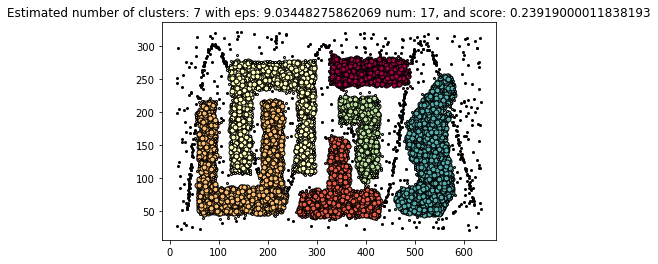

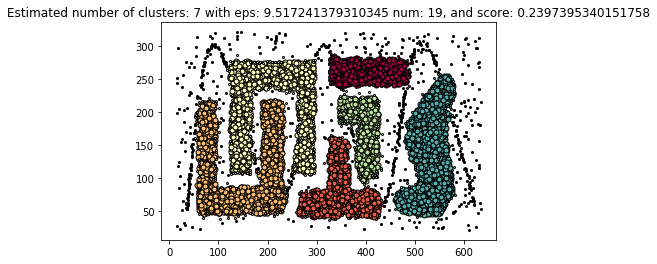

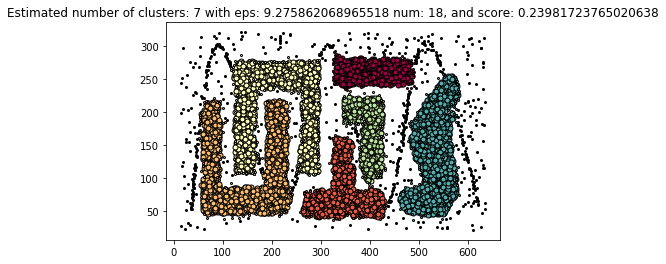

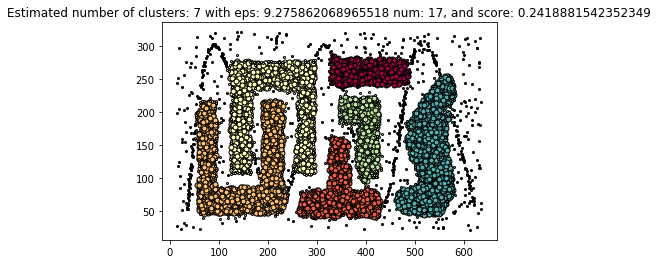

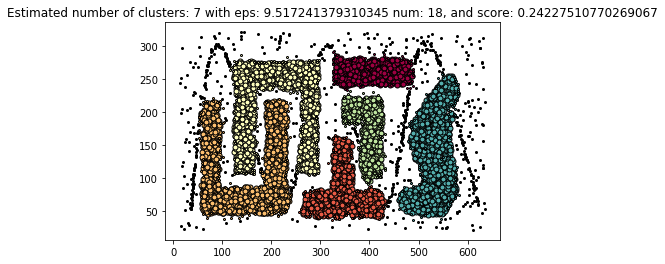

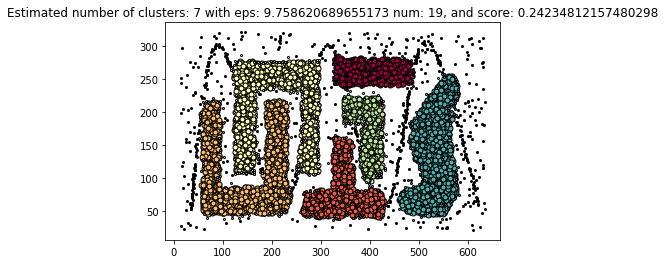

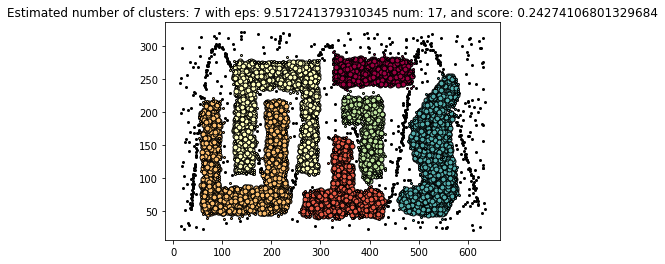

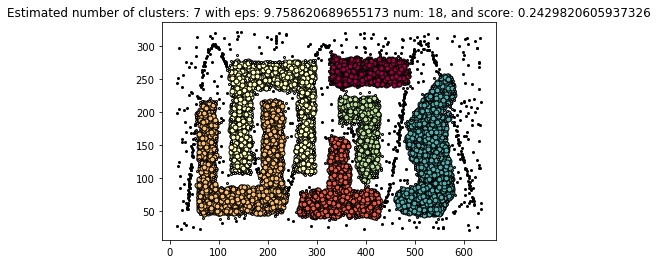

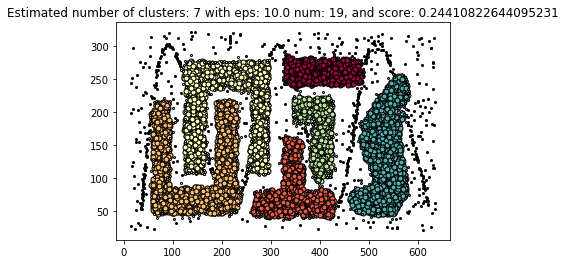

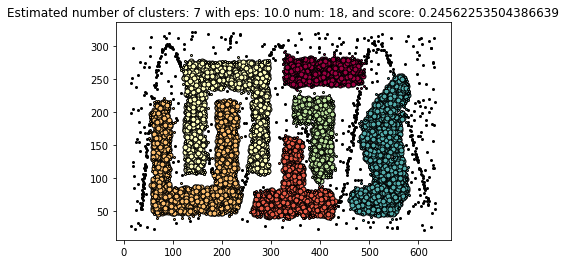

In [18]:
# getting those 10 parameters with best scores, then plot them to see the effects
import operator
sorted_scores_sil = sorted(scores_sil.items(), key=operator.itemgetter(1))
# get the ten best scores
ten_best_scores_sil = sorted_scores_sil[(len(sorted_scores_sil)-10):len(sorted_scores_sil)]

# plot images of clustering for two different scores
for ((eps, num), score) in ten_best_scores_sil:
    # plot the image of clustering
    plot_model(db_models[key], data1, eps, num, score)

### 2.4 same operations for the data 2

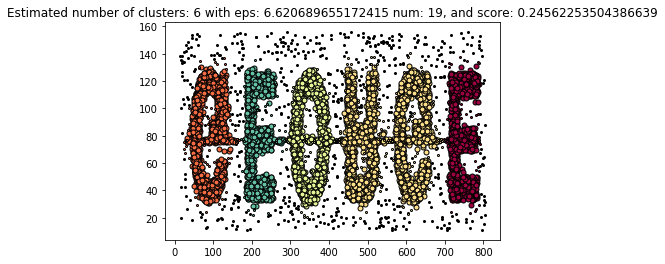

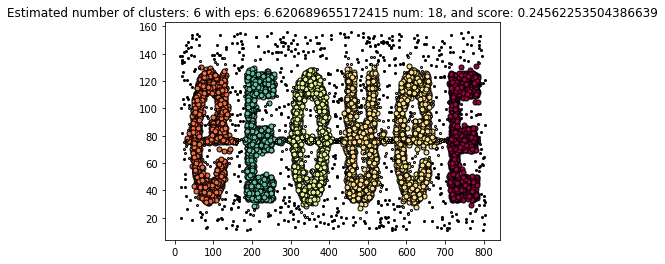

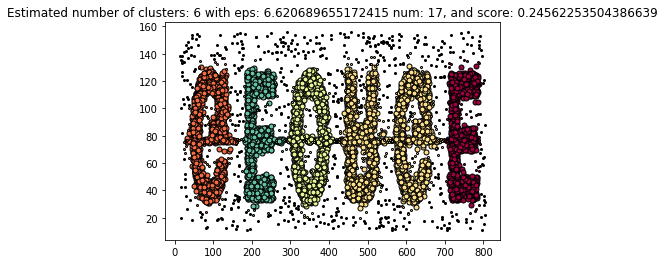

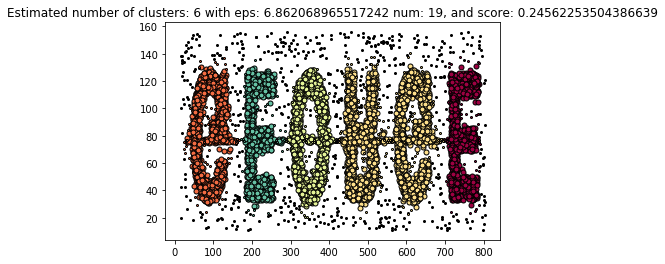

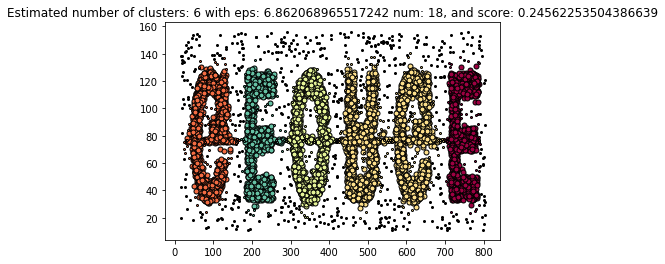

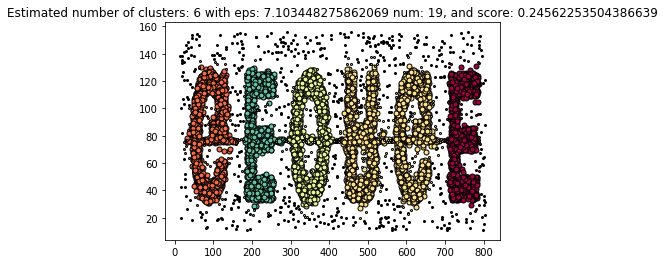

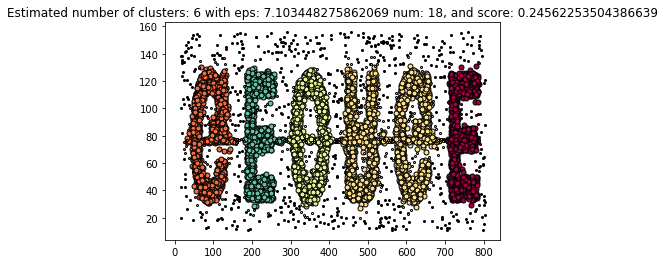

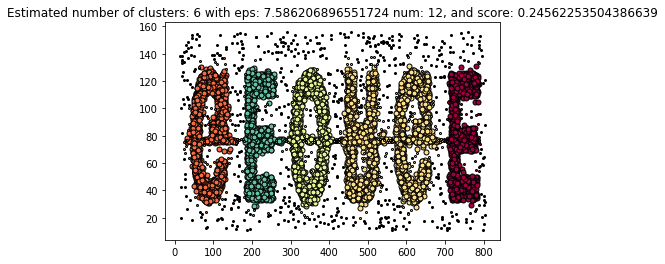

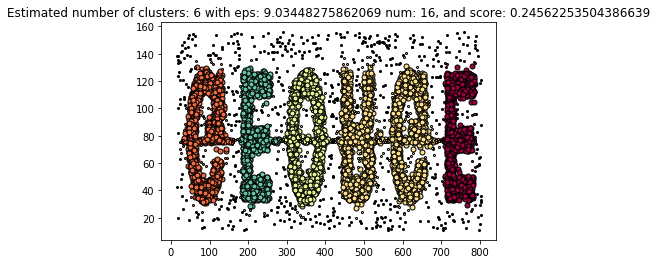

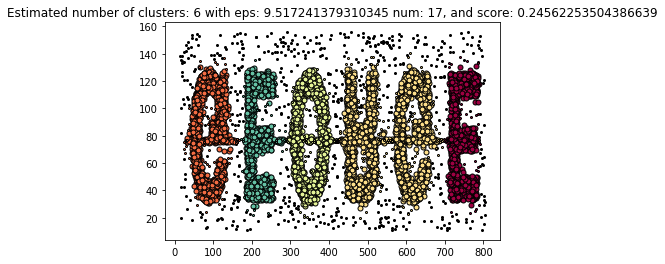

In [19]:
# training with dataset of data2
# using the function above
scores2_sil = {}
db_models2 = {}
# for the data1
for eps in epses:
    for num in num_neigbors:
        #print num, " ", eps
        scores_sil[(eps, num)], db_models[(eps, num)] = create_model_with_scores_diff(data2, eps, num)
#print "Score of different parameters are: ", scores

# getting those 10 parameters with best scores, then plot them to see the effects
sorted_scores_sil = sorted(scores_sil.items(), key=operator.itemgetter(1))
# get the ten best scores
ten_best_scores_sil = sorted_scores_sil[(len(sorted_scores_sil)-10):len(sorted_scores_sil)]

# plot images of clustering for two different scores
for ((eps, num), scores) in ten_best_scores_sil:
    # plot the image of clustering
    plot_model(db_models[key], data2, eps, num, score)

## 3. Second part for unsupervised learning: SNN(Shared Nearest Neighbors)   
SNN(Shared Nearest Neirghbors) is a new algorithm of clustering based on density. It redefines the way of density: the points have more common k-nearest neigbors with their neigbors, they are more likely to be the density.  

This algorithm aims to solve the inequality of density in the dataset. For DBSCAN, when the eps and number of neighbors are set, the strandard of density is decided. But if in different parts of dataset, they have inequalities in density, which will occurs the worst performance in clustering.  

The part of realisation of this algorithm is out of this notebook, you can find them in the same folder:
**snn_.py, snn_graph.py, and matrix_calculter.py**. You can see the descriptions in the file.

### 3.1 loading the modules of SNN, and creating functions for creating & fitting models, and plotting models

In [14]:
# load the SNN modules: snn_, snn_graph, matrix_calculater
import sys
#sys.path.append('./snn_')
from snn_ import SNN
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# trying to find the best parameters 
k_array = np.arange(5, 12, 1)
point_threshold_array = np.arange(150, 300, 10)
edge_threshold_array = np.arange(3, 5, 1)

# define the function of drawing the snn_model labels
def plot_labels(points, model, score):
    core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
    core_samples_mask[model.repr_points] = True   
    labels = model.labels_
    unique_labels = set(labels)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    colors = [plt.cm.Spectral(each) 
        for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)

        xy = points[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=5)

        xy = points[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=2)
    
    k_chosen = len(model.simi_array_k[0])
    p_t = model.point_threshold
    e_t = model.edge_threshold
    plt.title('clusters:'+str(n_clusters_)+',with k:'+str(k_chosen)+',point_threshold:'+str(p_t)+' and edge_threshold:'+str(e_t)+',score:'+str(score)+'')
    plt.show()

# define the function of getting the different snn models and return the model and score
def fit_snn_model(data, k_chosen, p_threshold, e_threshold, simi_array_k=None):
    if k_chosen <= 0:
        print "The parameter can not be 0"
        return 0
    snn_model = SNN(k=k_chosen, point_threshold=p_threshold, edge_threshold=e_threshold)
    if simi_array_k is None:
        snn_model.fit(data)
    else:
        snn_model.fit(data, simi_array_k)
    n_clusters_ = len(set(snn_model.labels_)) - (1 if -1 in snn_model.labels_ else 0)
    #print n_clusters_
    if(n_clusters_ <= 1):
        return -1, snn_model
    else:
        return metrics.silhouette_score(data, snn_model.labels_), snn_model

### 3.2 fitting the snn model with the parameters chosen  
Here, for acceelating the speed of calculation of matrix, we share the k-nearest neighbors array for each model when just point threshold changes.  

Another of accerlating the speed of calculation of matrix of distance is to lower the complexity of calculation. Perhapes multi-threads or using specific algorithms.

In [15]:
# because the snn_model contains so many attributes(so large for the memory), so e will just store 
# ten models with the best scores
score_model_dict = {}

# initialing the ten_best_scores all in -1
ten_best_scores = np.zeros(10) - 1

# iterating the point_threshold_array, edge_threshold_array for finding the best parameters
k_chosen = 20
# simi_array_k will update to None for each k_chosen
simi_array_k = None
e_t = 15
# print "k is ", k_chosen
for p_t in point_threshold_array:
        # print "    point_threshold is ", p_t, " and edge_threshold is ", e_t
        # creating and fitting the snn_model
        score, snn_model = fit_snn_model(data1, k_chosen, p_t, e_t, simi_array_k)
        
        # update the simi_array_k
        if simi_array_k is None:
            simi_array_k = snn_model.simi_array_k
                
        # if the score is better than the 10th score, so change it and store the model
        if score > min(ten_best_scores):
            # find the last score and replace it
            min_value = min(ten_best_scores)
            index = np.argwhere(ten_best_scores == min_value)
            ten_best_scores = np.delete(ten_best_scores, np.array([index[0]]))
            score_model_dict = {key:(score, model) for key, (score, model) in score_model_dict.items() if score != min_value}
                
            ten_best_scores = np.append(ten_best_scores, score)
            score_model_dict[(k_chosen, p_t, e_t)] = (score, snn_model)
        else:
            continue

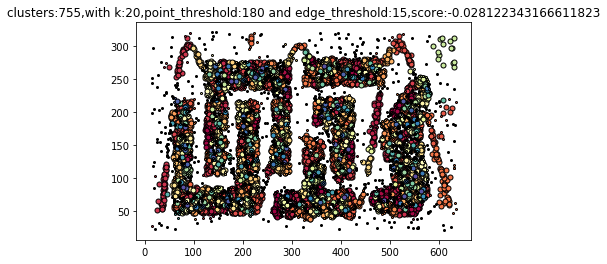

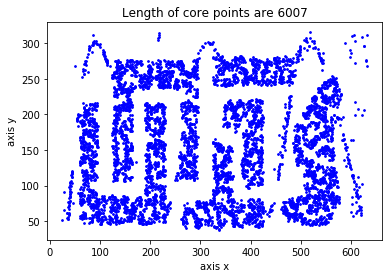

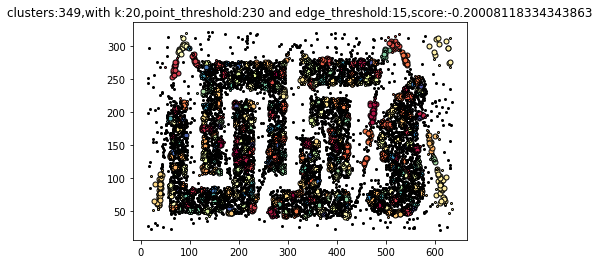

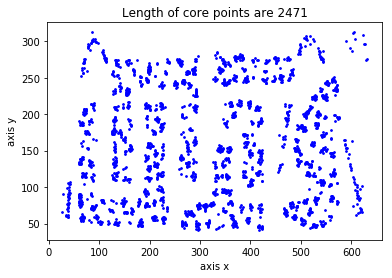

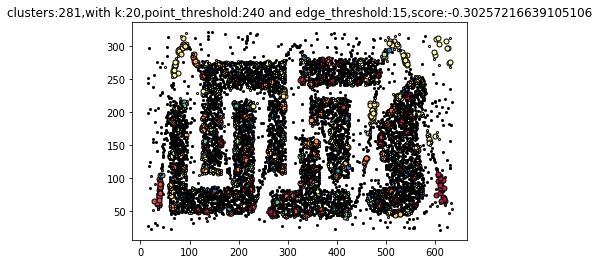

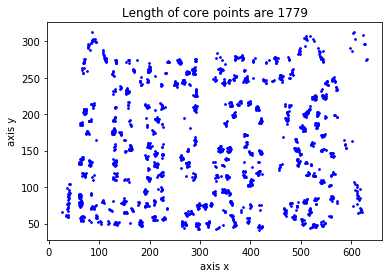

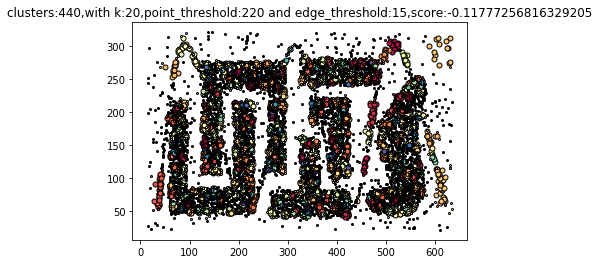

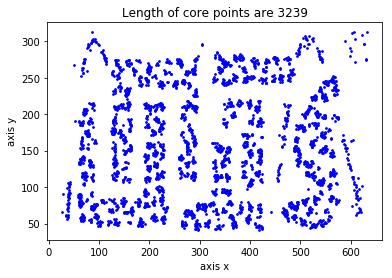

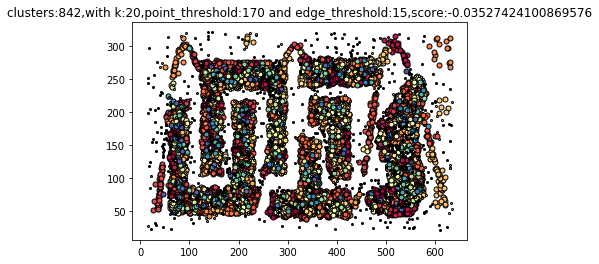

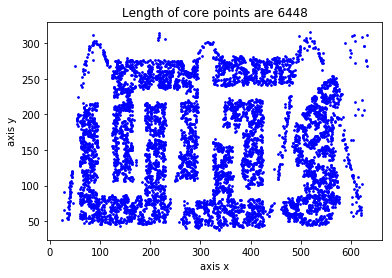

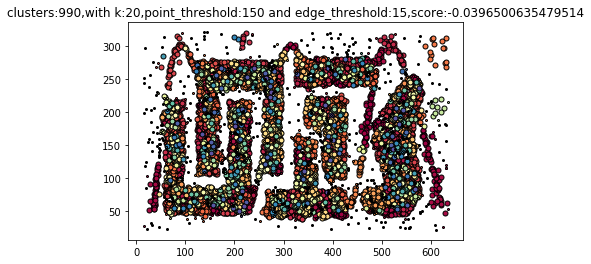

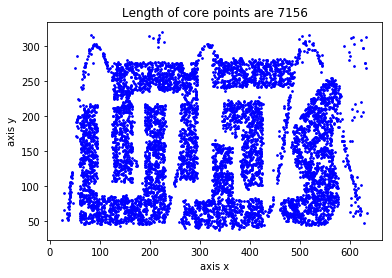

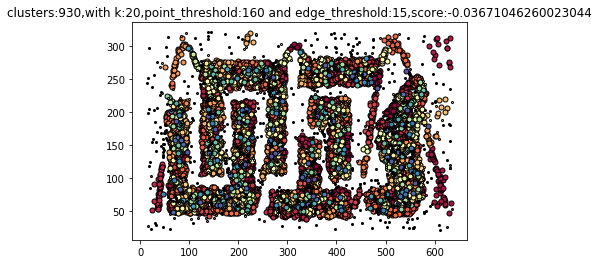

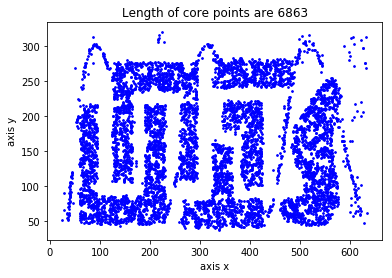

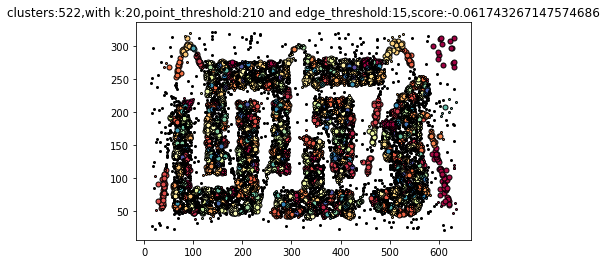

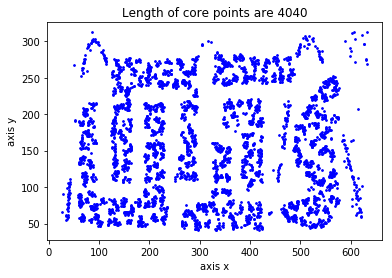

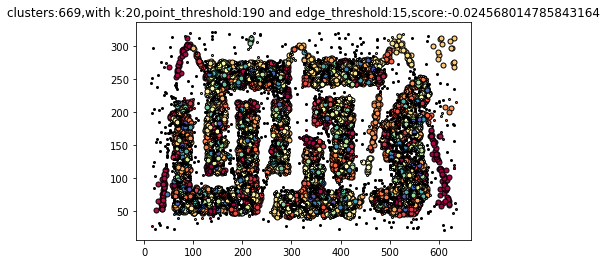

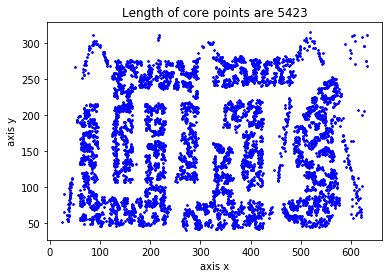

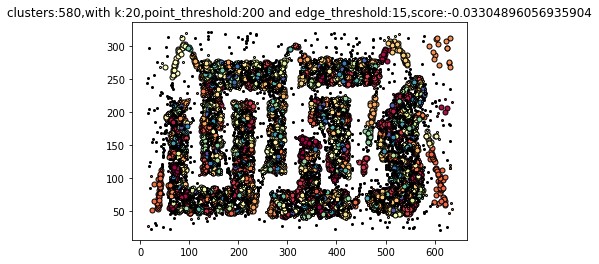

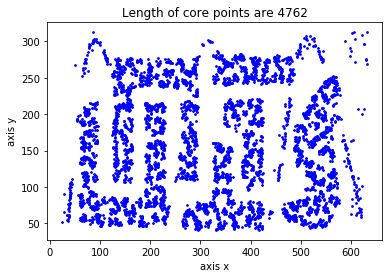

In [16]:
# after getting the ten best scores models, then draw the labels and core points
for (k, p_t, e_t), (score, snn_model) in score_model_dict.items():
    plot_labels(data1, snn_model,  score)
    snn_model.showRepresentativePoints2d(data1)

### 3.3 analysing the images got    
From the pervious images we got, it is easy to see that the performance of clustering is not good. On my opinion, perhaps there are some errors in the code, because with the same parameters in the paper(k = 20), the image of core points are not familiar. So perhaps there are some possibilities for this errors:   

**1. The problem of when define the core points**  
In the paper, the steps it writes is suddently after getting the sum of weight for each point. But in the section of images of core points, the time is changed, which is after deleting the links smaller than edge_threshold.

So, the first way is to change the time of calculating the core points.

**2. The problem of sharing the k-nearnest neighbors list**  
That is perhaps another reason.

So that is not end, I will continue to find the reason.